## **Trabajo práctico 1 - Matemática III**


---

**Docentes:**    

*   HENCEK, Mónica
*   SALAMIDA, Diego Hernán


**Alumna:**
*   SALAZAR GALLARDO, Ximena

In [456]:
# ¿-----------------De donde proviene el DataSet-----------------------?
# Ingresé al sitio:  https://www.kaggle.com/datasets
# donde pude obtener el siguiente Data Set : https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?utm_source=chatgpt.com

# ¿-----------------Que informacion contiene---------------------------?
# El archivo contiene información recopilada sobre sueldos de profesionales del sector tecnológico en India, con un enfoque particular en puestos de Android Developer y otras posiciones relacionadas con el desarrollo de software.
# Incluye datos como la empresa, el cargo, la ubicación, el tipo de empleo, la cantidad de sueldos reportados, el salario promedio anual (en rupias indias) y la valoración de la compañía según los empleados.
# Este dataset proviene de fuentes como Glassdoor y AmbitionBox, y fue publicado en Kaggle con el nombre Software Professional Salaries 2022. Su objetivo principal es permitir el análisis comparativo de salarios, la predicción de remuneraciones y el estudio de tendencias laborales en el sector tecnológico indio.

# ¿-----------------En que se va a enfocar este TP---------------------?
# El objetivo es realizar un análisis centrado exclusivamente en los registros correspondientes a New Delhi. Para ello, se implementará un filtro dentro del dataset que permita conservar únicamente los datos asociados a esa ubicación.
# Además, se incorporará una nueva columna que clasificará a las empresas según su calificación (Rating):
# asignando el valor 0 cuando el rating sea menor o igual a 4.30, y 1 cuando sea mayor.
# De esta forma, se busca facilitar el análisis comparativo del desempeño y la reputación de las empresas en esa región.


In [457]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
import statsmodels.api as sm
import sympy as sym
import re
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('Salary_Dataset_with_Extra_Features.csv')
df_new_delhi = df[df['Location'] == "New Delhi"]
df_new_delhi

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1584,3.8,Mobisoft Labs,Android Developer,312000,4,New Delhi,Full Time,Android
1585,3.6,Tech Mahindra,Android Developer,300000,4,New Delhi,Full Time,Android
1586,4.2,TO THE NEW,Android Developer,348000,4,New Delhi,Full Time,Android
1587,3.9,inoXapps,Android Developer,500000,4,New Delhi,Full Time,Android
1588,3.8,Mobikasa,Android Developer,180000,4,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
18734,4.6,"Upscale AI, Inc.",Software Development Engineer (SDE),600000,1,New Delhi,Full Time,SDE
18735,4.3,Government of India,Software Development Engineer (SDE),1200000,1,New Delhi,Full Time,SDE
18736,4.4,Madhu Infotech,Software Development Engineer (SDE) - Intern,60000,1,New Delhi,Intern,SDE
18737,3.6,Detox Technologies,Software Development Engineer (SDE),600000,1,New Delhi,Full Time,SDE


In [458]:
#Creamos la nueva columna con NaN
df_new_delhi['Rating Categoria'] = np.nan
df_new_delhi

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Rating Categoria
1584,3.8,Mobisoft Labs,Android Developer,312000,4,New Delhi,Full Time,Android,NaN
1585,3.6,Tech Mahindra,Android Developer,300000,4,New Delhi,Full Time,Android,NaN
1586,4.2,TO THE NEW,Android Developer,348000,4,New Delhi,Full Time,Android,NaN
1587,3.9,inoXapps,Android Developer,500000,4,New Delhi,Full Time,Android,NaN
1588,3.8,Mobikasa,Android Developer,180000,4,New Delhi,Full Time,Android,NaN
...,...,...,...,...,...,...,...,...,...
18734,4.6,"Upscale AI, Inc.",Software Development Engineer (SDE),600000,1,New Delhi,Full Time,SDE,NaN
18735,4.3,Government of India,Software Development Engineer (SDE),1200000,1,New Delhi,Full Time,SDE,NaN
18736,4.4,Madhu Infotech,Software Development Engineer (SDE) - Intern,60000,1,New Delhi,Intern,SDE,NaN
18737,3.6,Detox Technologies,Software Development Engineer (SDE),600000,1,New Delhi,Full Time,SDE,NaN


In [459]:
#Valoramos la columna Rating, así podemos empezar a trabajar con Rating Categoria
df_new_delhi['Rating'] = pd.to_numeric(df_new_delhi['Rating'], errors='coerce')
#Transformamos el NaN en 0 o 1, dependiendo de su Rating
df_new_delhi.loc[df_new_delhi['Rating'] <= 4.30, 'Rating Categoria'] = 0
df_new_delhi.loc[df_new_delhi['Rating'] > 4.30, 'Rating Categoria'] = 1
df_new_delhi

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Rating Categoria
1584,3.8,Mobisoft Labs,Android Developer,312000,4,New Delhi,Full Time,Android,0.0
1585,3.6,Tech Mahindra,Android Developer,300000,4,New Delhi,Full Time,Android,0.0
1586,4.2,TO THE NEW,Android Developer,348000,4,New Delhi,Full Time,Android,0.0
1587,3.9,inoXapps,Android Developer,500000,4,New Delhi,Full Time,Android,0.0
1588,3.8,Mobikasa,Android Developer,180000,4,New Delhi,Full Time,Android,0.0
...,...,...,...,...,...,...,...,...,...
18734,4.6,"Upscale AI, Inc.",Software Development Engineer (SDE),600000,1,New Delhi,Full Time,SDE,1.0
18735,4.3,Government of India,Software Development Engineer (SDE),1200000,1,New Delhi,Full Time,SDE,0.0
18736,4.4,Madhu Infotech,Software Development Engineer (SDE) - Intern,60000,1,New Delhi,Intern,SDE,1.0
18737,3.6,Detox Technologies,Software Development Engineer (SDE),600000,1,New Delhi,Full Time,SDE,0.0


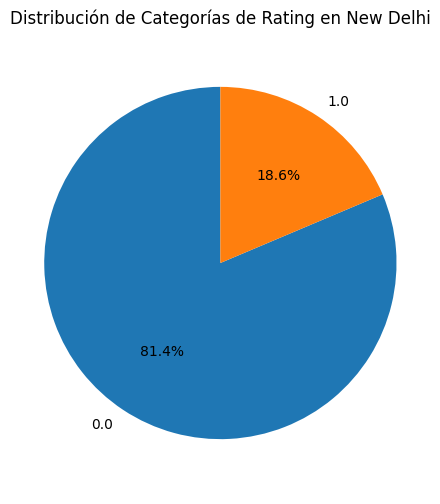

In [460]:
#Contar las ocurrencias de cada categoría en 'Rating Categoria',
rating_counts = df_new_delhi['Rating Categoria'].value_counts()

#Crear el gráfico de torta,
plt.figure(figsize=(5, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías de Rating en New Delhi')
plt.axis('equal') # La relación de aspecto igual asegura que el gráfico de torta se dibuje como un círculo.
plt.show()

## 1ra conclusión
En la ciudad de New Delhi, la mayoría de las empresas registradas presentan calificaciones iguales o menores a 4.30, representando aproximadamente el 81.4% del total.
Solo un 18.6% supera ese valor, lo que indica que las evaluaciones altas son menos frecuentes.
En general, esto sugiere que, dentro del conjunto analizado, la percepción de las empresas en New Delhi tiende a ser moderada o baja, con un número limitado de organizaciones destacándose por encima del promedio.

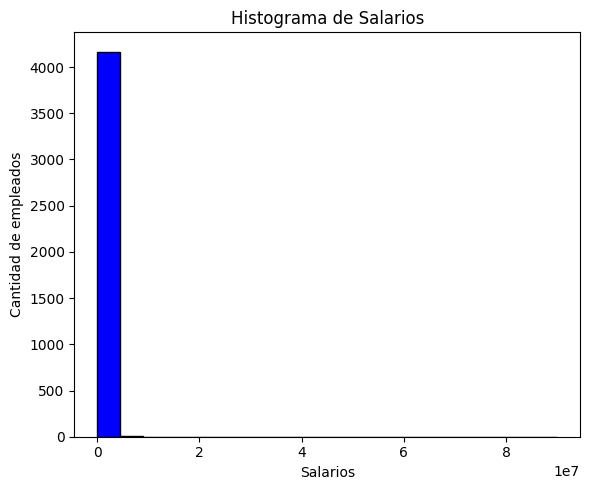

In [461]:
#Vamos a poner el histograma de salarios
plt.figure(figsize=(6, 5))
plt.hist(df_new_delhi['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Salarios')
plt.xlabel('Salarios')
plt.ylabel('Cantidad de empleados')
plt.tight_layout()
plt.show()


El histograma muestra que la gran mayoría de los empleados perciben salarios muy inferiores a los valores más altos registrados, ya que casi todos los datos se concentran al inicio del eje X.
Dado que los salarios están representados en una escala de ×10⁷, se observa que solo unos pocos casos aislados alcanzan montos muy elevados, lo que sugiere la presencia de outliers que amplían el rango total del gráfico.
Para poder resolver esto, hay que primero buscar los salarios que se alejan mucho del resto.

In [462]:
#Buscamos salarios mayores a 9000000
df_new_delhi[df_new_delhi['Salary'] > 9000000]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Rating Categoria
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE,0.0
18654,4.3,Digital Raju,Software Development Engineer (SDE),9800000,1,New Delhi,Full Time,SDE,0.0


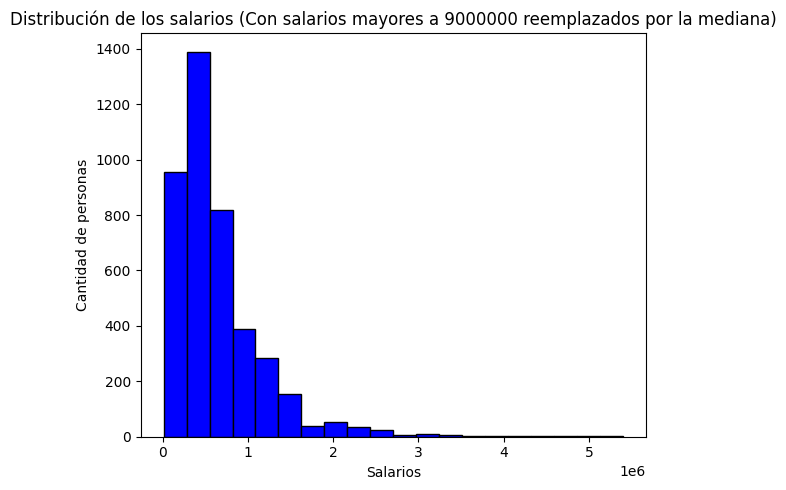

In [463]:
# Se visulizan dos salarios que se alejan de los demas, por ello buscamos el salario medio.
salario_medio = df_new_delhi['Salary'].median()
# Reemplazo los salarios mas altos, por la media
df_new_delhi['Salary'] = np.where(df_new_delhi['Salary'] > 9000000, salario_medio, df_new_delhi['Salary'])
# Grafico nuevamente el histograma de los salarios con los valores reemplazados
plt.figure(figsize=(6, 5))
plt.hist(df_new_delhi['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de los salarios (Con salarios mayores a 9000000 reemplazados por la mediana)')
plt.xlabel('Salarios')
plt.ylabel('Cantidad de personas')
plt.tight_layout()
plt.show()

Se puede observar que a medida que los salarios aumentan, la cantidad de personas disminuye rápidamente, mostrando una distribución sesgada a la derecha. Esto indica que hay pocos trabajadores con salarios muy altos, mientras que la gran mayoría gana menos de 1 millón.

Para llegar a ello, se aplicó un reemplazo de los salarios mayores a 9 millones por la mediana, lo que ayuda a reducir el efecto de valores extremos y proporciona una visualización más representativa de la distribución general.

**A partir de ahora se trendrán en cuenta estos datos.**

A continuacion se buscarán columnas puedan llegar a servir para la regresión lineal.

In [464]:
print(df['Employment Status'].unique())
print(df['Rating'].unique())
print(df['Job Roles'].unique())
# Se usaran estas 3 columnas, pero para eso, primero hay que pasarlas a numerico para enviar los datos

['Full Time' 'Intern' 'Contractor' 'Trainee']
[3.8  4.5  4.   4.4  4.2  3.7  3.1  3.6  3.9  4.8  4.1  4.3  4.9  5.
 4.6  3.3  2.9  3.5  3.   1.   3.4  2.8  4.7  3.2  2.4  2.2  2.7  1.8
 2.1  2.3  2.6  2.   1.4  1.5  2.5  1.7  1.9  1.6  3.95 1.3  3.85]
['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing']


In [465]:
# Nuevo dataset con las columnas de interes
df_selected = df_new_delhi[["Salary", "Rating", "Job Roles","Employment Status"]]
# Se pasó todo lo texto a numerico
df_selected['Employment Status Numeric'] = pd.factorize(df_new_delhi['Employment Status'])[0]
df_selected['Job Roles Numeric'] = pd.factorize(df_new_delhi['Job Roles'])[0]
df_numeric = df_selected[["Salary", "Rating", 'Job Roles Numeric',"Employment Status Numeric"]]
df_numeric

,Salary,Rating,Job Roles Numeric,Employment Status Numeric
1584,312000.0,3.8,0,0
1585,300000.0,3.6,0,0
1586,348000.0,4.2,0,0
1587,500000.0,3.9,0,0
1588,180000.0,3.8,0,0
...,...,...,...,...
18734,600000.0,4.6,4,0
18735,1200000.0,4.3,4,0
18736,60000.0,4.4,4,1
18737,600000.0,3.6,4,0


Antes de analizar los datos, se deben escalar, para que funcionen correctamente en la predicción

In [466]:
# Importar StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a escalar
columns_to_scale = ['Rating', 'Salary','Job Roles Numeric',"Employment Status Numeric"]

# Crear un objeto MinMaxScaler (entre 0 y 1)
scaler = MinMaxScaler()

# Escalar las columnas seleccionadas
df_numeric[columns_to_scale] = scaler.fit_transform(df_numeric[columns_to_scale])

# Mostrar las primeras filas del DataFrame con los datos escalados
print(df_numeric.head())

        Salary  Rating  Job Roles Numeric  Employment Status Numeric
1584  0.055679   0.700                0.0                        0.0
1585  0.053452   0.650                0.0                        0.0
1586  0.062361   0.800                0.0                        0.0
1587  0.090572   0.725                0.0                        0.0
1588  0.031180   0.700                0.0                        0.0


Ahora, con los datos ya escalados, podemos empezar a entrenar el modelo.

In [467]:
X = df_numeric[["Rating"]] # X contendrá todas las columnas excepto 'Salary'
y = df_numeric['Salary'] # y contendrá solo la columna 'Salary'

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Se usaron el 20% de los datos para prueba
model = LinearRegression() # Crear un objeto de regresión lineal
model.fit(X_train, y_train) # Acá se entrena el modelo con los datos de entrenamiento

LinearRegression()

In [468]:
y_pred = model.predict(X_test) # Se hacen predicciones sobre el conjunto de prueba

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06948402191384934
Mean Squared Error: 0.01059249601309394
Root Mean Squared Error: 0.10291985237598206


In [469]:
# Se agrega una constante (intersección) al modelo
X_train_sm = sm.add_constant(X_train)

# Verificar tipos de datos en X_train_sm
print("Data types of X_train_sm columns:")
print(X_train_sm.dtypes)

# Verificar si hay valores NaN en X_train_sm
print("\nNumber of NaN values in X_train_sm per column:")
print(X_train_sm.isnull().sum())

# Crear y ajustar el modelo OLS (Ordinary Least Squares) con los datos limpios y convertidos
model_sm = sm.OLS(y_train, X_train).fit()

# Imprimir el resumen del modelo
print(model_sm.summary())

Data types of X_train_sm columns:
const     float64
Rating    float64
dtype: object

Number of NaN values in X_train_sm per column:
const     0
Rating    0
dtype: int64
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                              4140.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):                        0.00
Time:                        19:31:13   Log-Likelihood:                          2882.8
No. Observations:                3340   AIC:                                     -5764.
Df Residuals:                    3339   BIC:                                     -5758.
Df Model:                           1                                                  
Covariance Type:            nonrobust  

## 2da conclusion.
El R cuadrado nos da 0,55 por lo que podemos concluir que el modelo de Regresión lineal no sirve para estos datos (ya que es un valor bajo para ser confiable, tiene un 50% de efectividad), por lo que se necesitaría otro modelo, pero podemos hacer otros analísis

Se procede a hacer el promedio de salario por cada Job Role, para comparar que rol cobra más en promedio

In [470]:
df_new_delhi_android = df_new_delhi[df_new_delhi["Job Roles"] == "Android"]
#promedio de rating y de salario de los trabajadores de android
promedio_rating_android = df_new_delhi_android["Rating"].mean()
promedio_salario_android = df_new_delhi_android["Salary"].mean()
print("Promedio de rating de los trabajadores de Android:", promedio_rating_android)
df_new_delhi_Backend = df_new_delhi[df_new_delhi["Job Roles"] == "Backend"]
#promedio de rating y de salario de los trabajadores de Backend
promedio_rating_Backend = df_new_delhi_Backend["Rating"].mean()
promedio_salario_Backend = df_new_delhi_Backend["Salary"].mean()
print("Promedio de rating de los trabajadores de Backend:", promedio_rating_Backend)
df_new_delhi_Frontend = df_new_delhi[df_new_delhi["Job Roles"] == "Frontend"]
#promedio de rating y de salario de los trabajadores de Frontend
promedio_rating_Frontend = df_new_delhi_Frontend["Rating"].mean()
promedio_salario_Frontend = df_new_delhi_Frontend["Salary"].mean()
print("Promedio de rating de los trabajadores de Frontend:", promedio_rating_Frontend)
df_new_delhi_IOS = df_new_delhi[df_new_delhi["Job Roles"] == "IOS"]
#promedio de rating y de salario de los trabajadores de IOS
promedio_rating_IOS = df_new_delhi_IOS["Rating"].mean()
promedio_salario_IOS = df_new_delhi_IOS["Salary"].mean()
print("Promedio de rating de los trabajadores de IOS:", promedio_rating_IOS)
df_new_delhi_SDE = df_new_delhi[df_new_delhi["Job Roles"] == "SDE"]
#promedio de rating y de salario de los trabajadores de SDE
promedio_rating_SDE = df_new_delhi_SDE["Rating"].mean()
promedio_salario_SDE = df_new_delhi_SDE["Salary"].mean()

Promedio de rating de los trabajadores de Android: 3.896530612244898
Promedio de rating de los trabajadores de Backend: 3.97719298245614
Promedio de rating de los trabajadores de Frontend: 3.9826315789473687
Promedio de rating de los trabajadores de IOS: 3.980443828016644


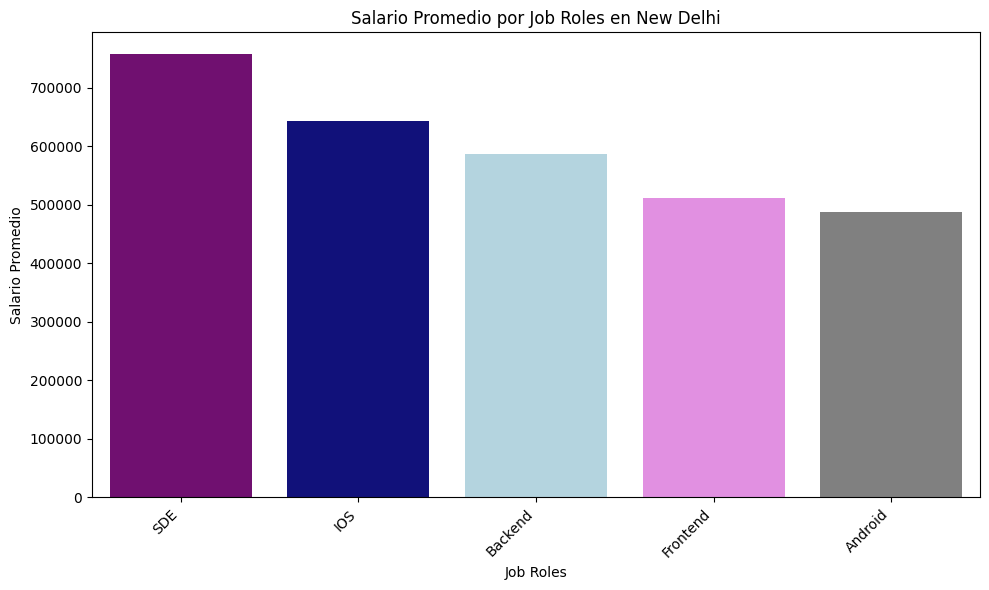

In [471]:
promedios_salario_por_rol = df_new_delhi.groupby('Job Roles')['Salary'].mean().sort_values(ascending=False)
colors = ['purple', 'darkblue', 'lightblue', 'violet', 'grey']
# 1. Crea el gráfico de barras
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=promedios_salario_por_rol.index, y=promedios_salario_por_rol.values, palette=colors)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Job Roles')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Job Roles en New Delhi')
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se solapen
plt.show()

In [472]:
#Promedio de todos los salarios
print("Promedio de salario de los trabajadores de Android:", promedio_salario_android)
print("Promedio de salario de los trabajadores de Backend:", promedio_salario_Backend)
print("Promedio de salario de los trabajadores de Frontend:", promedio_salario_Frontend)
print("Promedio de salario de los trabajadores de IOS:", promedio_salario_IOS)
print("Promedio de salario de los trabajadores de SDE:", promedio_salario_SDE)

Promedio de salario de los trabajadores de Android: 487203.8857142857
Promedio de salario de los trabajadores de Backend: 586436.8922305765
Promedio de salario de los trabajadores de Frontend: 511674.5263157895
Promedio de salario de los trabajadores de IOS: 642365.6477115118
Promedio de salario de los trabajadores de SDE: 756567.2452830189


## 3ra conclusión.
Se puede observar lo siguiente:

1) Diferencias entre roles:

   Los trabajadores de SDE (Software Development Engineer) tienen el salario promedio más alto: 756.567, lo que indica que este rol es el más valorizado dentro de los perfiles mostrados.

   Le siguen IOS (642.365) y Backend (586.436), mostrando que los perfiles de desarrollo móvil y de servidores están mejor remunerados que los de frontend y Android.

   Frontend (511.674) y Android (487.203) son los roles con menor promedio salarial en este conjunto, lo que puede reflejar la oferta y demanda de estos perfiles o la especialización requerida.


2) Rango de salarios:

   Hay una diferencia notable entre el salario más bajo (Android: ~487k) y el más alto (SDE: ~756k), lo que representa aproximadamente un 55% de diferencia. Esto sugiere que la especialización y el rol dentro del equipo de desarrollo impactan significativamente en la remuneración.

3) Tendencia general:

   Existe una tendencia clara: mientras más crítico y especializado es el rol dentro del desarrollo de software, mayor es el salario promedio.

Ahora se analiza el promedio del Rating

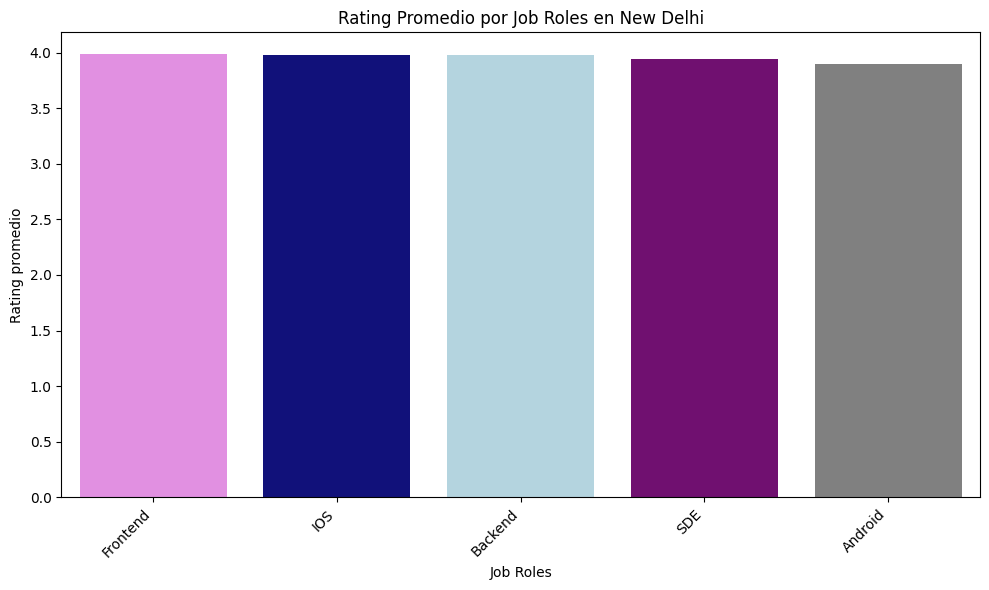

In [473]:
promedios_rating_por_rol = df_new_delhi.groupby('Job Roles')['Rating'].mean().sort_values(ascending=False)
colors = ['violet', 'darkblue', 'lightblue', 'purple', 'grey']
# . Crea el gráfico de barras
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=promedios_rating_por_rol.index, y=promedios_rating_por_rol.values, palette=colors)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Job Roles')
plt.ylabel('Rating promedio')
plt.title('Rating Promedio por Job Roles en New Delhi')
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se solapen
plt.show()
#Este grafico, es de orden descendente (Es decir, de mayor a menor)

In [474]:
#Promedios de Rating por Job Role
print("Promedio de rating de los trabajadores de SDE:", promedio_rating_SDE)
print("Promedio de rating de los trabajadores de Frontend:", promedio_rating_Frontend)
print("Promedio de rating de los trabajadores de Backend:", promedio_rating_Backend)
print("Promedio de rating de los trabajadores de IOS:", promedio_rating_IOS)
print("Promedio de rating de los trabajadores de Android:", promedio_rating_android)

Promedio de rating de los trabajadores de SDE: 3.9380306603773585
Promedio de rating de los trabajadores de Frontend: 3.9826315789473687
Promedio de rating de los trabajadores de Backend: 3.97719298245614
Promedio de rating de los trabajadores de IOS: 3.980443828016644
Promedio de rating de los trabajadores de Android: 3.896530612244898


## 4ta conclusion.
Se puede observar que los rating no tienen mucho que ver con los salarios, ya que SDE (Que es el que tiene el salario más elevado), tienen casi el peor rating de todos (solo por encima de los de Android)

Por último, se obtendrá como son los salarios en relación a la media, usando categoría de Rating y Job Roles

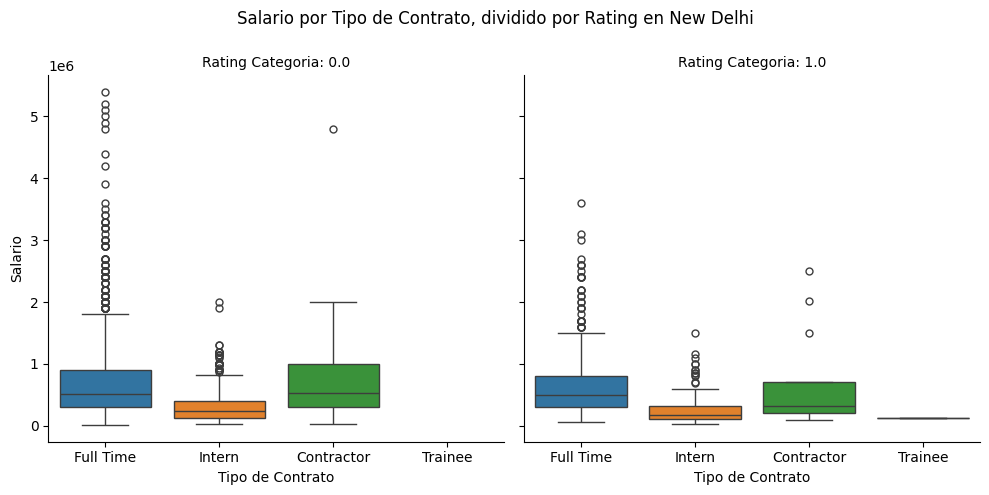

In [475]:
g = sns.catplot(
    data=df_new_delhi, # Se usa este dataframe como fuente
    x='Employment Status', # X variable
    y='Salary',           # Y variable
    hue='Employment Status', # Hue variable (Podría ser lo mismo que x para colorear por categoría.)
    col='Rating Categoria',  # Column variable
    kind='box',
    height=5,
    aspect=1
)

# Con esto se ajustan los títulos y las etiquetas según sea necesario
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Salario por Tipo de Contrato, dividido por Rating en New Delhi')
g.set_axis_labels("Tipo de Contrato", "Salario")
g.set_titles("Rating Categoria: {col_name}") # Se agregan los titulos a la columna (Rating Categoria)

plt.show()

## 5ta Conclusión.
Con este grafico, se pueden observar que hay muchos salarios que se elajan de la media, ademas, las empresas con menos rating no tienen pasantes (Trainee).

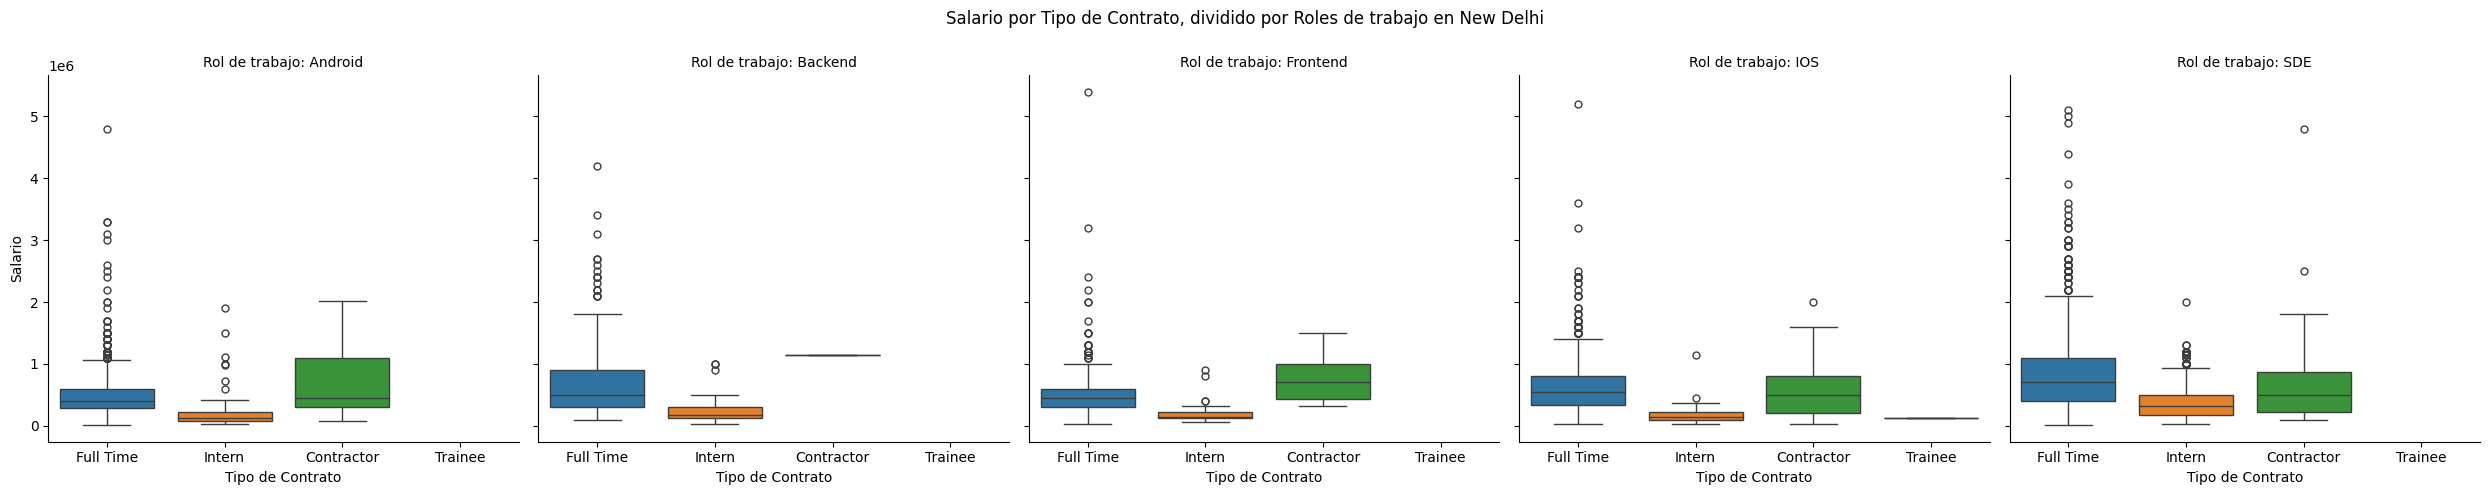

In [476]:
g = sns.catplot(
    data=df_new_delhi, # Usamos este dataframe como fuente
    x='Employment Status', # X variable
    y='Salary',           # Y variable
    hue='Employment Status', # Hue variable (Podría ser lo mismo que x para colorear por categoría.)
    col='Job Roles',  # Column variable (using Rating Categoria for 'dedicacion')
    kind='box',
    height=5,
    aspect=1
)

# Adjust titles and labels as needed
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Salario por Tipo de Contrato, dividido por Roles de trabajo en New Delhi')
g.set_axis_labels("Tipo de Contrato", "Salario")
g.set_titles("Rol de trabajo: {col_name}") # Set titles for each column (Job Role)

plt.show()

## 6ta conclusión.

- De la misma manera, este gráfico demuestra que hay muchos salarios que se alejan de la media. Menos los tercializados de Android, que tienen salarios muy en la media.
- IOS es el único rol de trabajo con Pasantes (Trainee), y tiene muy pocos internos.
- Backend es el que menos contratados tiene (tercializados).


## Conclusión Final
A pesar que la regresión lineal no nos sirva para predecir los datos que decidimos utilzar, aún así pudimos concluir muchas cosas sobre los trabajos en New Delhi.
Las IA utilizada fue ChatGPT (OpenAI)